# Projekt PRiAD - Wine Quality Datasheet

Autorzy: Patryk Sajkowski, Mikołaj Pątkowski

Projekt ten ma na celu przeprowadzenie analizy eksploracyjnej oraz klasyfikacji zbioru danych dotyczących win. Zadanie klasyfikacji odbędzie się przy pomocy klasyfikatorów:
- Drzewa Decyzyjnego
- AdaBoost

W końcowej części zostaną porównane wyniki przeprowadzonych klasyfikacji.

Link do zbioru: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

# Analiza zbioru

## Import bibliotek

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

## Wczytanie zbioru

In [2]:
df = pd.read_csv('WineQT.csv')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Atrybut **Id** dla obiektu o numerze 1142 ma wartość 1597, co może sugerować zagubienie części danych w procesie zbierania ich (nie dostarczono wszystkich), bądź pomyłkę przy numeracji obiektów

## Podstawowe statystyki

Liczba obiektów:  1143
Liczba klas:  6
Obiektów w klasie  5 :  483
Obiektów w klasie  6 :  462
Obiektów w klasie  7 :  143
Obiektów w klasie  4 :  33
Obiektów w klasie  8 :  16
Obiektów w klasie  3 :  6
Liczba atrybutów:  13
Ilość braków:  0


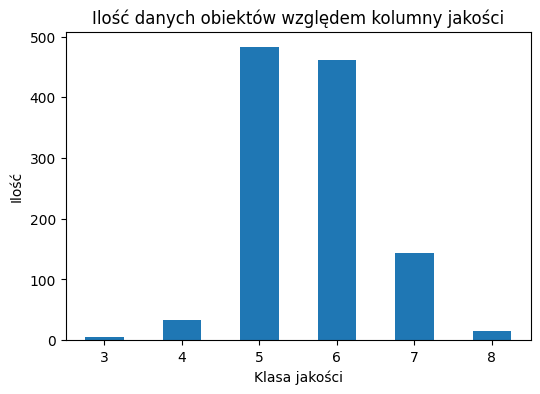

In [3]:
# liczba obiektów
print("Liczba obiektów: ", df.shape[0])
# liczba klas
klasy = df['quality'].unique()
print("Liczba klas: ", klasy.shape[0])
# liczba obiektów
for i in list(klasy):
    print("Obiektów w klasie ", i, ": ", len(df[df['quality'] == i]))
# liczba atrybutów
print("Liczba atrybutów: ", df.shape[1])
# liczba braków
print("Ilość braków: ", df.isnull().sum().sum())

# wykres
plt.figure(figsize=(6, 4))
df['quality'].value_counts().sort_index().plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów względem kolumny jakości', fontsize=12)
plt.xlabel('Klasa jakości', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Zbiór posiada 6 klas jakości (3, 4, 5, 6, 7, 8) oraz nie posiada braków. Większość obiektów mieści się w klasach 5, 6, 7. Jednocześnie ma 13 atrybutów, z czego jeden to ID, który jest zbędny

In [4]:
df = df.drop(columns = 'Id')

## Wykresy

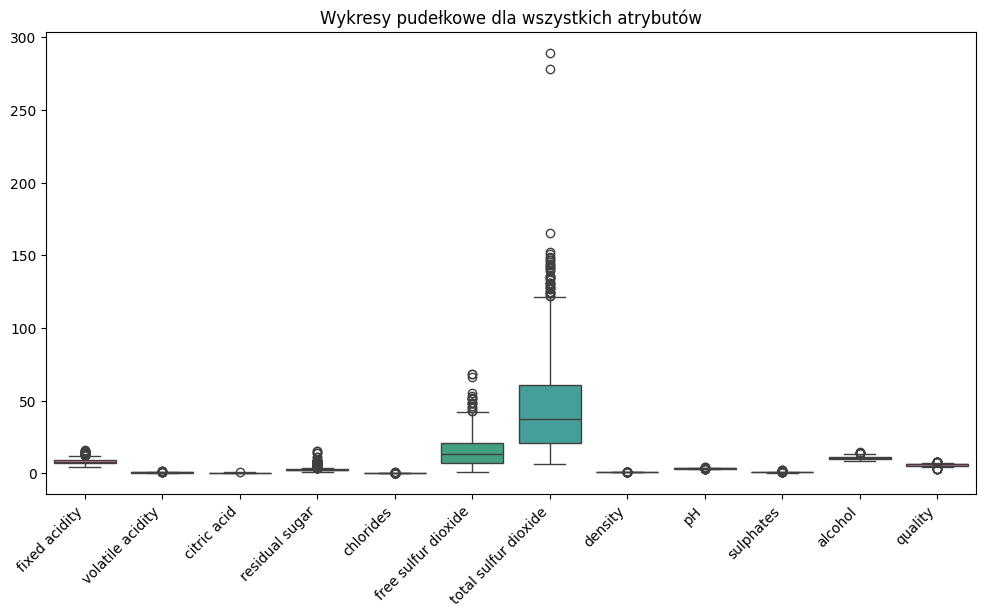

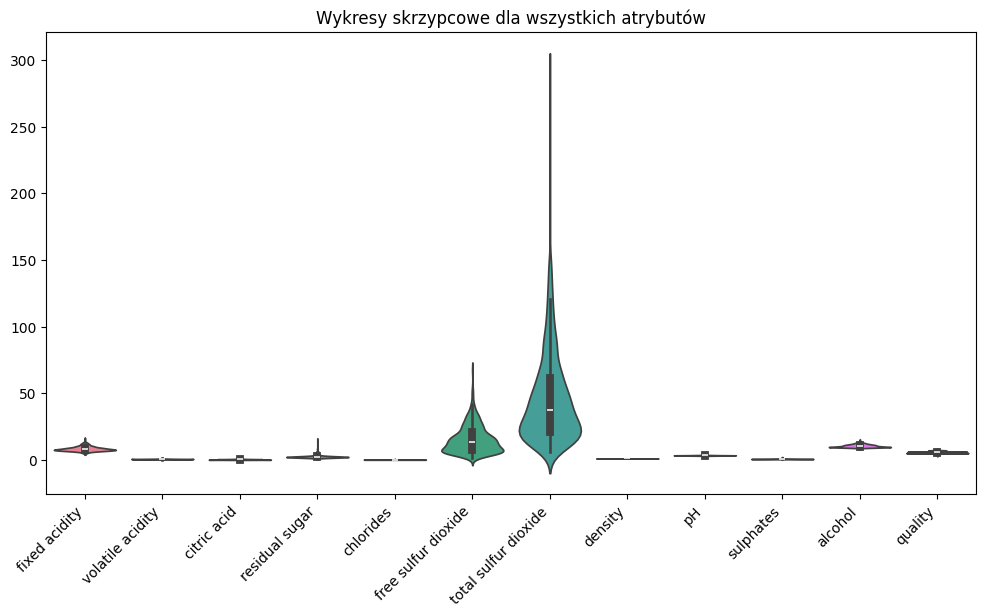

In [5]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.boxplot(data = df).set_title("Wykresy pudełkowe dla wszystkich atrybutów")
plt.show()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.violinplot(data = df).set_title("Wykresy skrzypcowe dla wszystkich atrybutów")
plt.show()

Z wykresu wynika, że kolumny free sulfur dioxide i total sulfur dioxide posiadają kilka obiektów o wartościach podejrzanie niepasujących do reszty. Prawdopodobnie są to błędy.

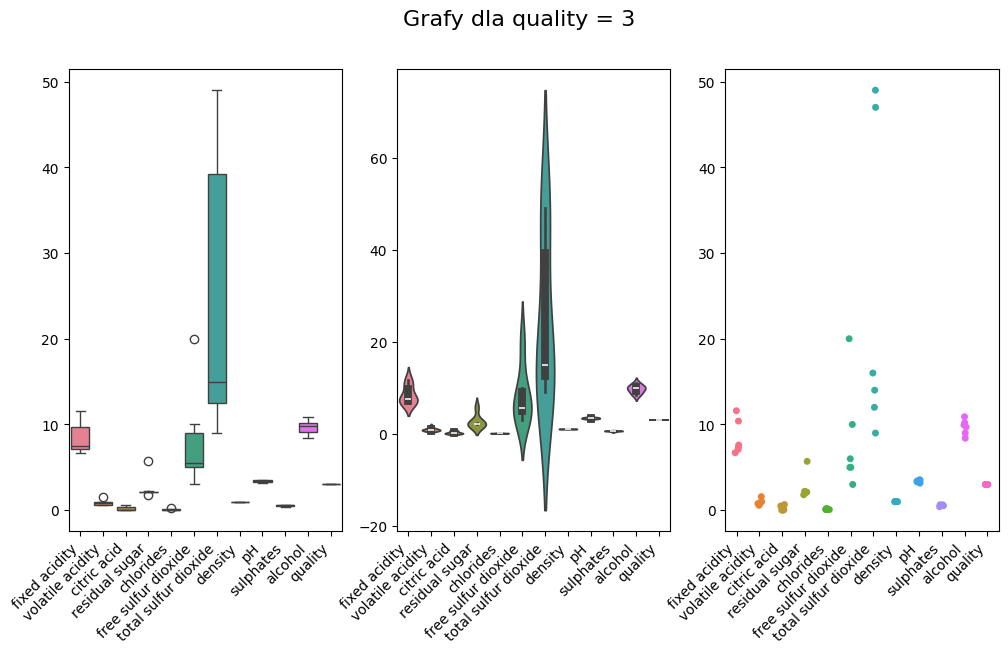

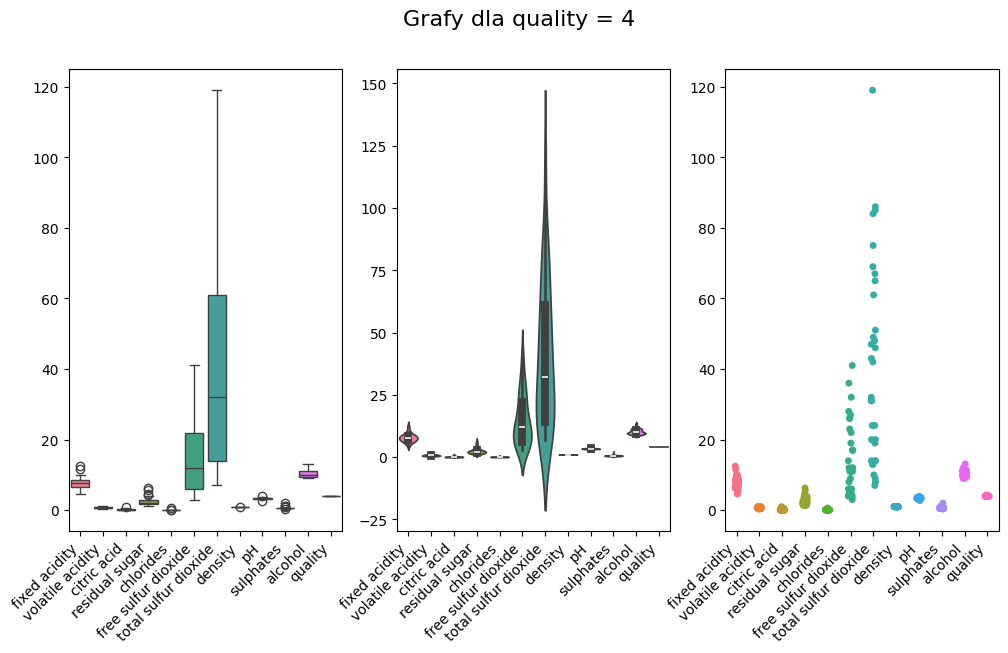

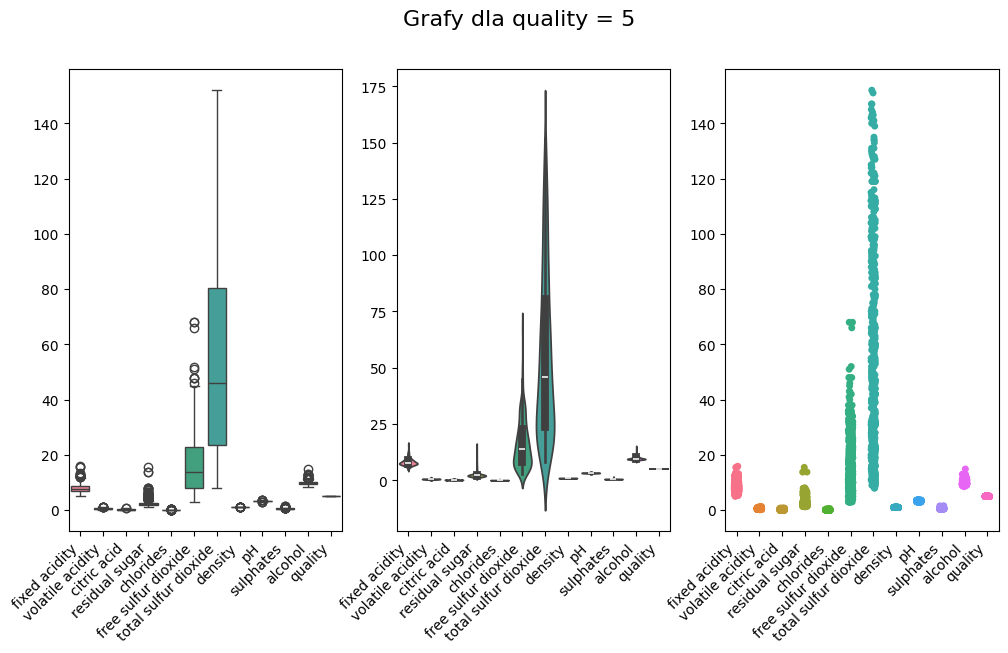

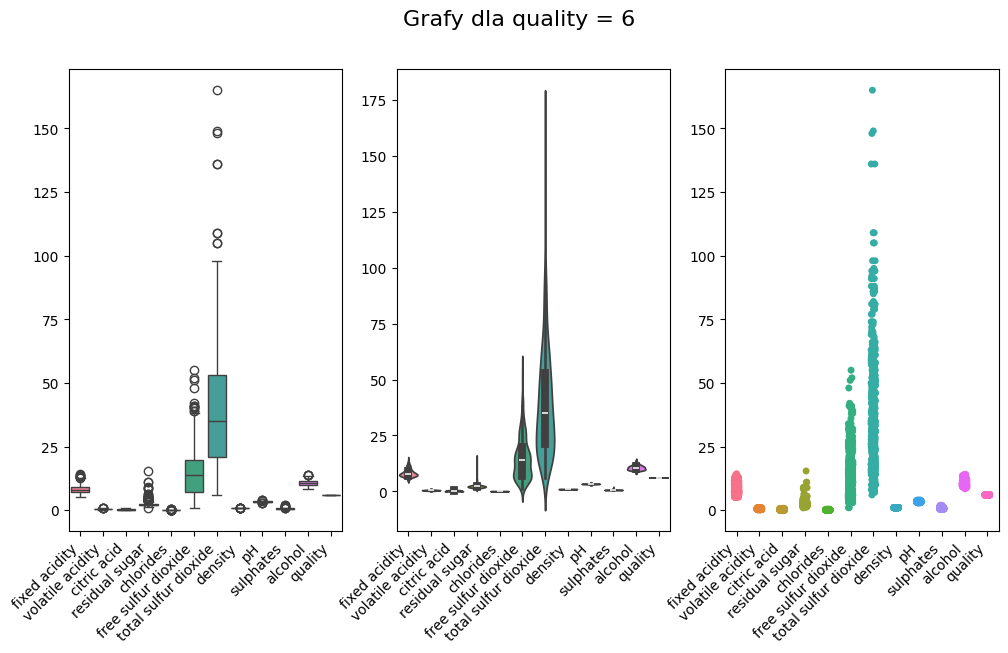

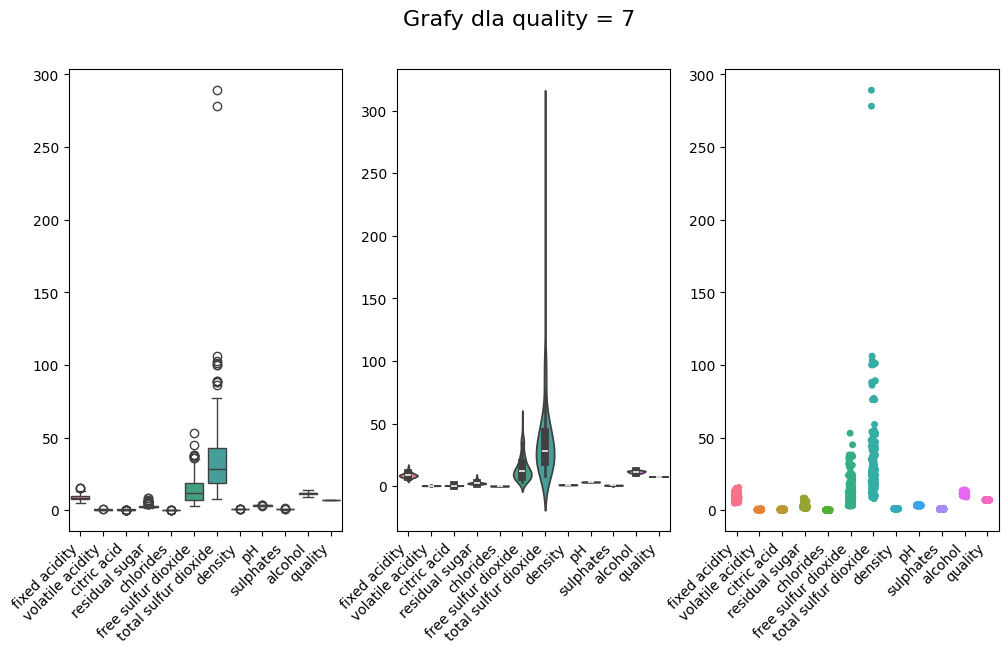

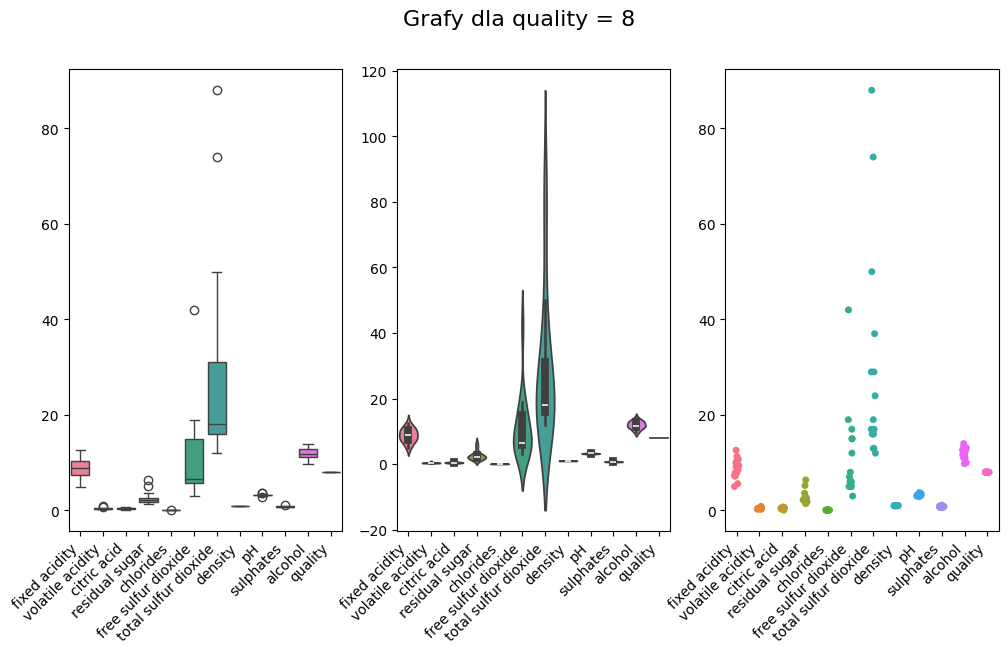

In [6]:
for klasa in range(3, 9):
    dane_k = df[df['quality'] == klasa]
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Grafy dla quality = {klasa}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(rotation=45, ha='right')
    sns.boxplot(data=dane_k)
    
    plt.subplot(1, 3, 2)
    plt.xticks(rotation=45, ha='right')
    sns.violinplot(data=dane_k)
    
    plt.subplot(1, 3, 3)
    plt.xticks(rotation=45, ha='right')
    sns.stripplot(data=dane_k)
    
    
    plt.show()

Po przeanalizowaniu wykresów atrybutów dla każdego quality osobno można wywnioskować, że wina jakości 3, 4, 6, 7, 8 posiadają obiekty o zbyt wysokiej wartości free sulfur dioxide i total sulffur dioxide. Te wyniki można uznać za błędne.

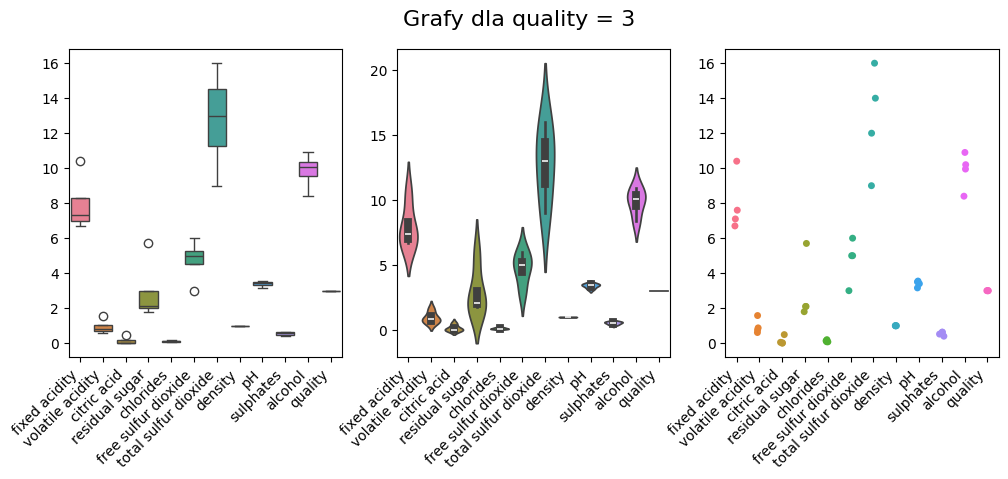

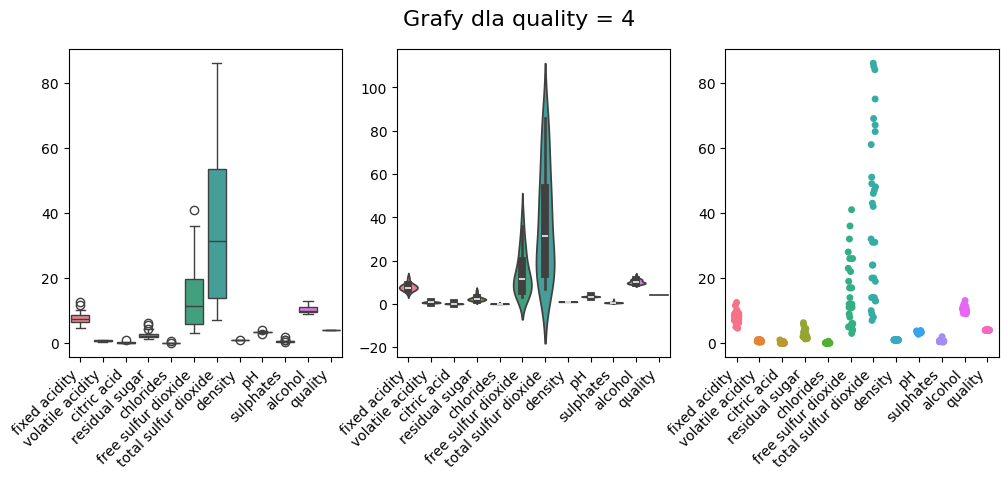

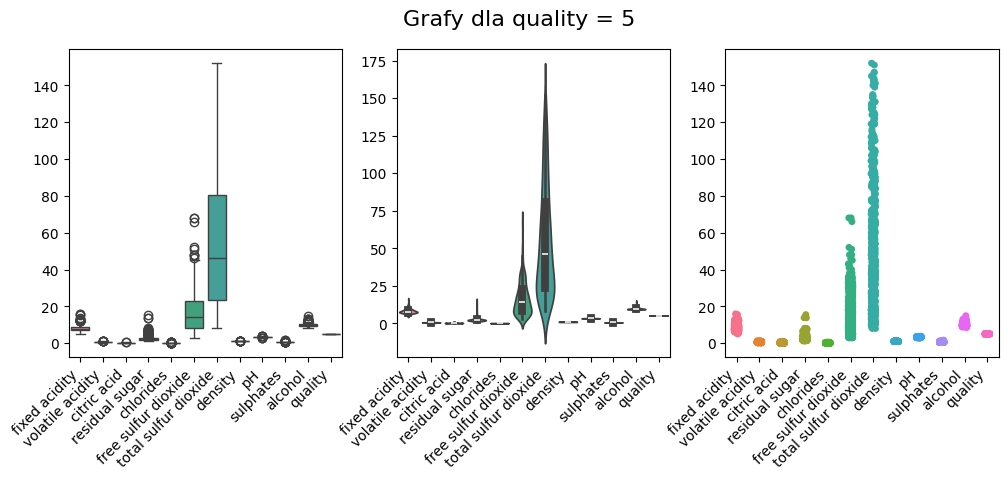

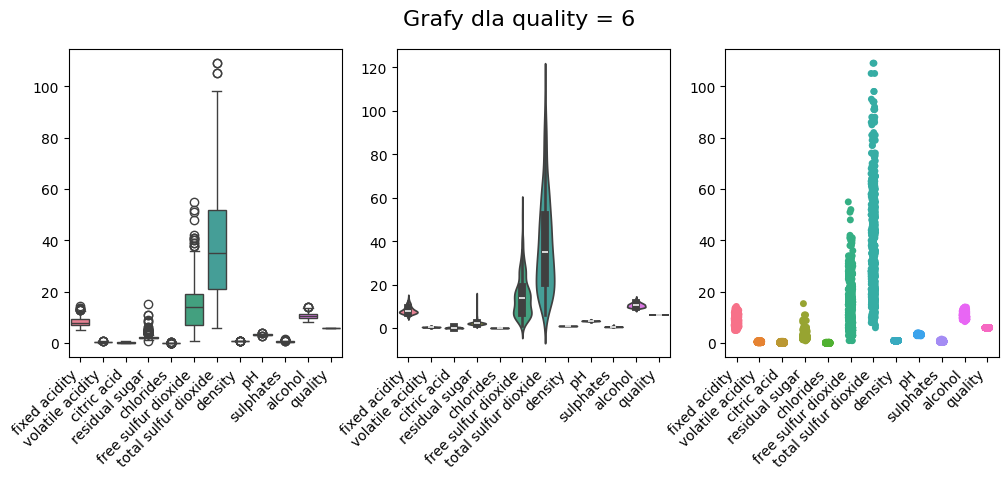

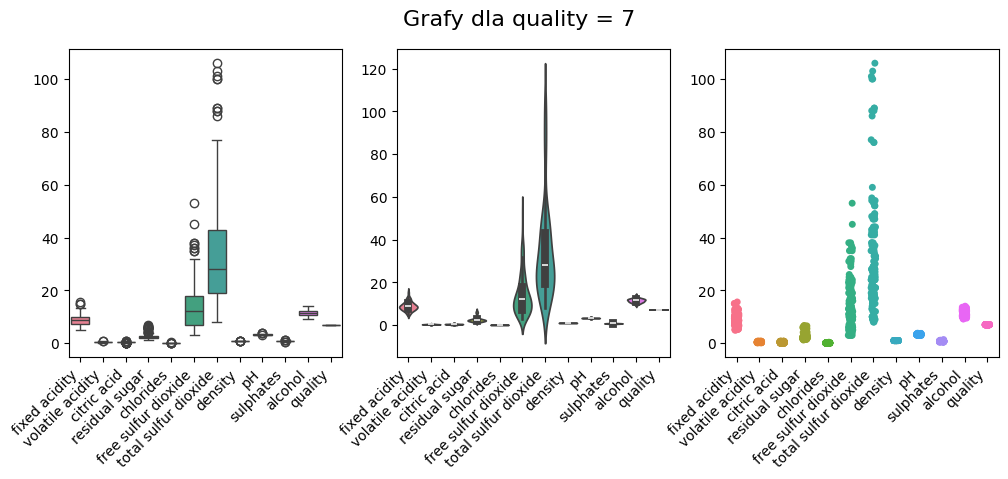

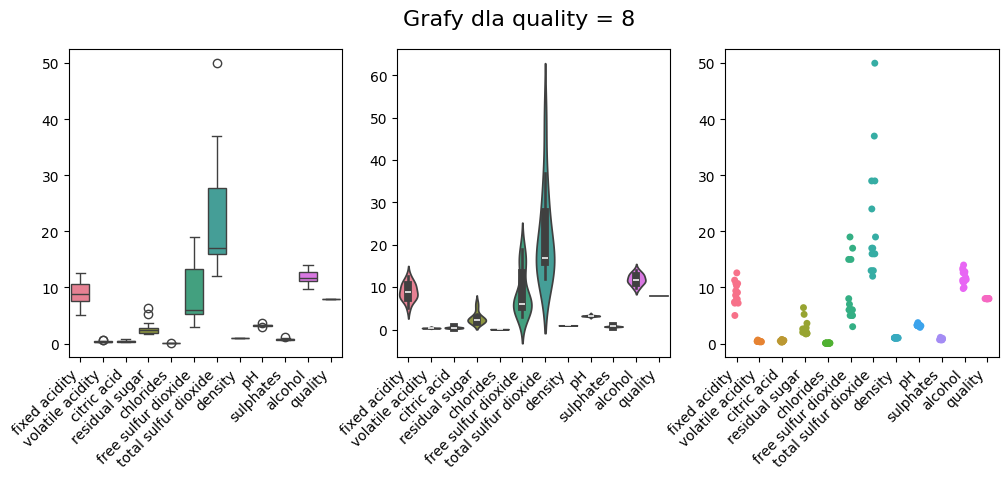

In [7]:
# usunięcie obiektów
df = df[(df['quality'] != 3) | (df['total sulfur dioxide'] <= 40)]
df = df[(df['quality'] != 3) | (df['free sulfur dioxide'] <= 15)]

df = df[(df['quality'] != 4) | (df['total sulfur dioxide'] <= 100)]

df = df[(df['quality'] != 6) | (df['total sulfur dioxide'] <= 125)]

df = df[(df['quality'] != 7) | (df['total sulfur dioxide'] <= 250)]

df = df[(df['quality'] != 8) | (df['total sulfur dioxide'] <= 60)]
df = df[(df['quality'] != 8) | (df['free sulfur dioxide'] <= 30)]

# ponowne wyświetlenie danych
for klasa in range(3, 9):
    dane_k = df[df['quality'] == klasa]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla quality = {klasa}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(rotation=45, ha='right')
    sns.boxplot(data=dane_k)
    
    plt.subplot(1, 3, 2)
    plt.xticks(rotation=45, ha='right')
    sns.violinplot(data=dane_k)
    
    plt.subplot(1, 3, 3)
    plt.xticks(rotation=45, ha='right')
    sns.stripplot(data=dane_k)
    
    
    plt.show()

Teraz wykresy prezentują się dokładniej

## Standardowe miary

In [8]:
opis = df.drop(columns = 'quality') # kolumna quality nie jest potrzebna przy obliczaniu miar
opis.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,8.315119,0.531764,0.267162,2.522591,0.087088,15.503979,44.918214,0.996748,3.312838,0.655606,10.436546
std,1.748524,0.179025,0.196077,1.327152,0.047447,10.190605,30.538264,0.001907,0.155411,0.161500,1.078194
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,60.000000,0.997860,3.400000,0.725000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,152.000000,1.003690,4.010000,2.000000,14.900000


Różnice pomiędzy wartością minimalną i maksymalną:
* fixed acidity = 7,6
* volatile acidity = 1,05
* citric acid = 0,73
* residual sugar = 15,27
* chlorides = 0,52
* free sulfur dioxide = 52,38
* total sulfur dioxide = 243,1
* density = 0,01
* pH = 0,7
* sulphates = 1,34
* alcohol = 4,5

Kolumny free sulfur dioxide i total sulfur dioxide rozróżniają się danymi większymi o rzędy wielkości w porównaniu do reszty atrybutów. Z drugiej strony, atrybuty o najmniejszych wartościach to citric acid i chlorides.

Znaczące odchylenie standardowe (powyżej 1) jest obecne dla atrybutów:
* fixed acidity
* residual sugar
* free sulfur dioxide (10,25)
* total sulfur dioxide (32,78)
* alcohol

Atrybuty chlorides i density mają znikome odchylenie standardowe, czyli wartości powinny tworzyć skupiska. 

## Korelacja

<Axes: >

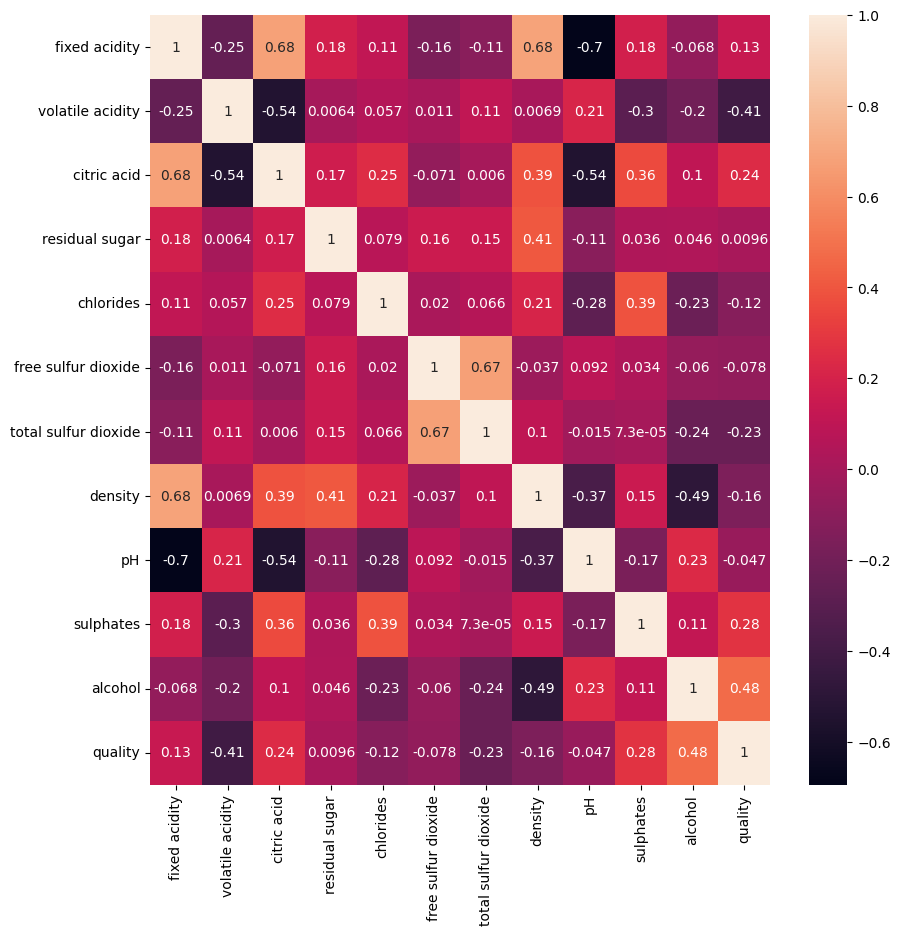

In [9]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df.corr(),annot = df.corr())

Dane nie są ze sobą skorelowane. Korelacja mieści się w przedziale <-0,7; 0.68>

## Podział zbioru danych na zbiór uczący i testowy

In [10]:
# WYWOŁANIE:
# trin_test_split( macierz bez atr. decyzyjnego, macierz atrybutów decyzyjnych, prororcja, seed (do reprodukcji) )
opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.3, random_state=0)

# opis_ucz - macierz wartości atrybutów opisowych zbioru uczącego
# dec_ucz - macierz wartości (wektor) atrybutu decyzyjnego zbioru uczącego (quality)
# test_ucz - macierz wartości atrybutów opisowych zbioru testowego
# test_dec - macierz wartości (wektor) atrybutu decyzyjnego zbioru testowego (quality)
print('Liczba obiektów zbioru uczącego: ', len(opis_ucz))
print('Liczba obiektów zbioru testowego: ', len(opis_test))

Liczba obiektów zbioru uczącego:  791
Liczba obiektów zbioru testowego:  340


Dane zostały podzielone w relacji 70% - 30%

# Uczenie i testowanie zadanych klasyfikatorów

## Drzewo decyzyjne

In [12]:
#funkcje pomocnicze

def verify(model, opis_ucz, opis_test, dec_ucz, dec_test, dokl_ucz, dokl_test):
    '''
    funkcja wypisuje w terminalu macierz pomylek, dla danego modelu i danych
    '''
    wynik_ucz = model.predict(opis_ucz)
    wynik_test = model.predict(opis_test)
    mp = confusion_matrix(dec_ucz, wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:", np.sum(np.diag(mp))/np.sum(mp))
    dokl_ucz.append(model.score(opis_ucz, dec_ucz))
    print(model.score(opis_ucz, dec_ucz), type(model.score(opis_ucz, dec_ucz)))
    print(mp)
    mp = confusion_matrix(dec_test, wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:", np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(opis_test, dec_test))
    dokl_test.append(model.score(opis_test, dec_test))
    print(mp)

def plot_results(x, dokl_ucz, dokl_test, title, x_label):
    '''
    funkcja odpowiada za wizualizacje dokladnosci uczenia dla danych testowych
    
    parametry:
        x - dana rozdzielczość, dla której zebrane są dane uczenia
        dokl_ucz - wyniki dokladnosci, dla danych uczących
        dokl_test - wyniki dokladnosci, dla danych testowych
    '''
    plt.figure(dpi=100)
    plt.title(title)
    plt.plot(x, dokl_ucz, 'bo-', label = 'dane uczące')
    plt.xlabel(x_label)
    plt.ylabel('Dokładność')
    plt.plot(x, dokl_test, 'ro-', label = 'dane testowe')
    plt.legend(loc='center right')
    plt.show()

Dane dla maksymalnej głębokości 1
macierz pomyłek - zbiór uczący, dokładność: 0.5600505689001264
0.5600505689001264 <class 'numpy.float64'>
[[  0   0   0   1   0   0]
 [  0   0  15   9   0   0]
 [  0   0 288  50   0   0]
 [  0   0 167 155   0   0]
 [  0   0  17  81   0   0]
 [  0   0   1   7   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5558823529411765
0.5558823529411765
[[  0   0   3   0   0   0]
 [  0   0   5   3   0   0]
 [  0   0 120  25   0   0]
 [  0   0  66  69   0   0]
 [  0   0  11  32   0   0]
 [  0   0   1   5   0   0]]
glebokosc drzewa decyzyjnego: 1 dla max glebokosci: 1


Dane dla maksymalnej głębokości 2
macierz pomyłek - zbiór uczący, dokładność: 0.5600505689001264
0.5600505689001264 <class 'numpy.float64'>
[[  0   0   0   1   0   0]
 [  0   0  15   9   0   0]
 [  0   0 288  50   0   0]
 [  0   0 167 155   0   0]
 [  0   0  17  81   0   0]
 [  0   0   1   7   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5558823529411765
0.5558823529411765
[[  0   0

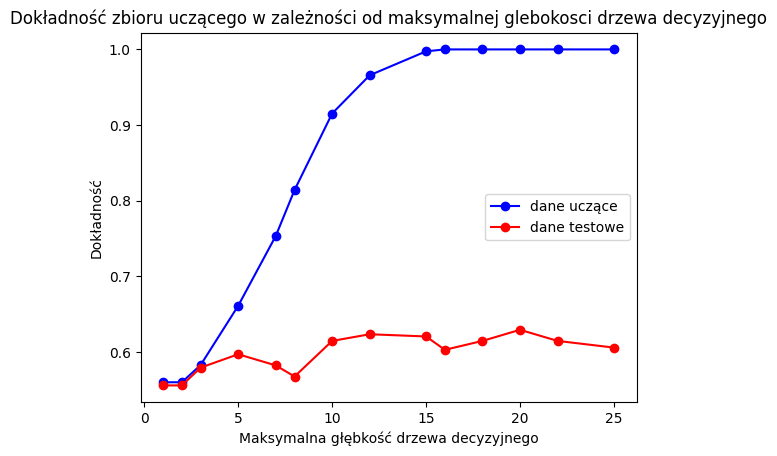

Maksymalna dokładność dla zbioru testowego: 0.6294117647058823 dla maksymalnej głębokości: 20


In [13]:
depths = [1, 2, 3, 5, 7, 8, 10, 12, 15, 16, 18, 20, 22, 25]
dokl_ucz = []
dokl_test =[]

for i, g in enumerate(depths):
    model = tree.DecisionTreeClassifier(max_depth = g)
    model.fit(opis_ucz, dec_ucz)
    print('Dane dla maksymalnej głębokości', g)
    verify(model, opis_ucz, opis_test, dec_ucz, dec_test, dokl_ucz, dokl_test)
    print('glebokosc drzewa decyzyjnego:', model.get_depth(), 'dla max glebokosci:', g)
    print('\n')
title = 'Dokładność zbioru uczącego w zależności od maksymalnej glebokosci drzewa decyzyjnego'
x_label = 'Maksymalna głębkość drzewa decyzyjnego'
plot_results(depths, dokl_ucz, dokl_test, title, x_label)
print('Maksymalna dokładność dla zbioru testowego:', max(dokl_test), 'dla maksymalnej głębokości:', depths[dokl_test.index(max(dokl_test))])

Dla klasyfikacji używając drzewa decyzyjnego najlepsze wyniki dokładności dopasowania obserwujemy dla głębokości 7*, dla której to dokładność wynosi: 
- dla zbioru uczącego = 0,77,
- dla zbioru testowego = 0,59. 
Jest tak, ponieważ dla głębszych drzew występuję zjawisko przetrenowania, gdzie występuję coraz to lepsze dopasowanie do zbioru uczącego przy spadku dokładności dla danych testowych i model zaczyna gorzej klasyfikować nieznane dane. 

To zjawisko jest charakterystyczne dla drzewa decyzyjnego, które jest bardzo dobre, przy dopasowaniu do danych testowych, ale nie jest wystarczającą elastyczne, aby tak samo dobrze klasyfikować nowe elementy.

*Należy zauważyć, że do wartości 15 dla maksymalnej głębokości, formowane drzewo zawsze ma zadaną głębokość (czyli dla 8 - 8), a powyżej tej wartości formowane drzewo przestaje się rozszerzać, ponieważ osiągneliśmy maksymalne dopasowanie. Teoretycznie bardzo podobną (nawet o promile wyższą) wartość dokładności dla danych testowych otrzymujemy dla drzewa o głębokości 1, jednakże wtedy dokładność dla zbioru uczącego wynosi jednynie 0,54 , przez co nie jest dobrym wyborem.

## Ada Boost

In [15]:
def analyze_ada_boost(r):
    x = [10, 50, 100, 150, 200, 300]
    dokl_ucz = []
    dokl_test =[]
    for i, g in enumerate(x):
        AdaModel = AdaBoostClassifier(n_estimators=g, learning_rate = r)
        model = AdaModel.fit(opis_ucz, dec_ucz)
        verify(model, opis_ucz, opis_test, dec_ucz, dec_test, dokl_ucz, dokl_test)
        print('\n')

    title = 'Dokładność zbioru uczącego (learning_rate = ' + str(r) + ')'
    x_label = 'Ilość estymatorów'
    plot_results(x, dokl_ucz, dokl_test, title, x_label)
    print('Maksymalna dokładność dla zbioru testowego:', max(dokl_test), 'dla ilosći estymatorow:', x[dokl_test.index(max(dokl_test))])

macierz pomyłek - zbiór uczący, dokładność: 0.5878634639696586
0.5878634639696586 <class 'numpy.float64'>
[[  0   0   0   1   0   0]
 [  0   0  15   9   0   0]
 [  0   0 248  90   0   0]
 [  0   0 105 217   0   0]
 [  0   0   4  94   0   0]
 [  0   0   0   8   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5852941176470589
0.5852941176470589
[[  0   0   3   0   0   0]
 [  0   0   4   4   0   0]
 [  0   0 102  43   0   0]
 [  0   0  38  97   0   0]
 [  0   0   4  39   0   0]
 [  0   0   0   6   0   0]]


macierz pomyłek - zbiór uczący, dokładność: 0.5575221238938053
0.5575221238938053 <class 'numpy.float64'>
[[  0   0   1   0   0   0]
 [  0   0  16   8   0   0]
 [  0   0 180 158   0   0]
 [  0   0  61 261   0   0]
 [  0   0   2  96   0   0]
 [  0   0   0   8   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5676470588235294
0.5676470588235294
[[  0   0   2   1   0   0]
 [  0   0   2   6   0   0]
 [  0   0  77  68   0   0]
 [  0   0  19 116   0   0]
 [  0   0   2  41   0  

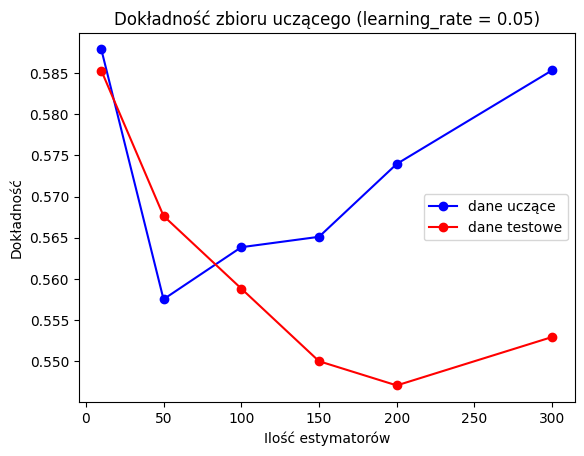

Maksymalna dokładność dla zbioru testowego: 0.5852941176470589 dla ilosći estymatorow: 10
macierz pomyłek - zbiór uczący, dokładność: 0.5423514538558787
0.5423514538558787 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0  10  14   0   0]
 [  0   0 150 188   0   0]
 [  0   0  44 278   0   0]
 [  0   0   1  97   0   0]
 [  0   0   0   8   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5588235294117647
0.5588235294117647
[[  0   0   2   1   0   0]
 [  0   0   3   5   0   0]
 [  0   0  67  78   0   0]
 [  0   0  12 123   0   0]
 [  0   0   1  42   0   0]
 [  0   0   0   6   0   0]]


macierz pomyłek - zbiór uczący, dokładność: 0.5815423514538559
0.5815423514538559 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   1  17   6   0   0]
 [  0   0 196 141   1   0]
 [  0   0  73 244   5   0]
 [  0   0   2  78  18   0]
 [  0   0   0   6   2   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5852941176470589
0.5852941176470589
[[  0   0   2   1   0   0]
 [  0   0   3 

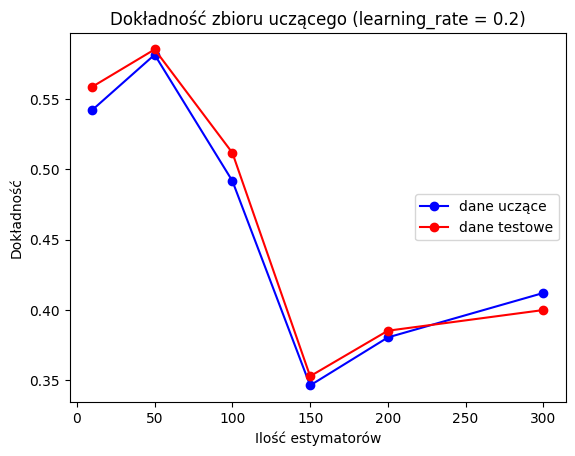

Maksymalna dokładność dla zbioru testowego: 0.5852941176470589 dla ilosći estymatorow: 50
macierz pomyłek - zbiór uczący, dokładność: 0.5676359039190898
0.5676359039190898 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0  20   4   0   0]
 [  0   0 216 120   2   0]
 [  0   0  89 228   5   0]
 [  0   0   2  92   4   0]
 [  0   0   0   8   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.5294117647058824
0.5294117647058824
[[ 0  0  2  1  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0 89 56  0  0]
 [ 0  0 42 91  2  0]
 [ 0  0  2 41  0  0]
 [ 0  0  0  5  1  0]]


macierz pomyłek - zbiór uczący, dokładność: 0.41845764854614415
0.41845764854614415 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   8   8   7   1   0]
 [  0  46 143 117  30   2]
 [  0  17  95 118  88   4]
 [  0   0  20  16  61   1]
 [  0   0   0   4   4   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.4235294117647059
0.4235294117647059
[[ 0  0  0  3  0  0]
 [ 0  0  5  3  0  0]
 [ 0 11 71 50 13  0]
 [ 0 11 45 4

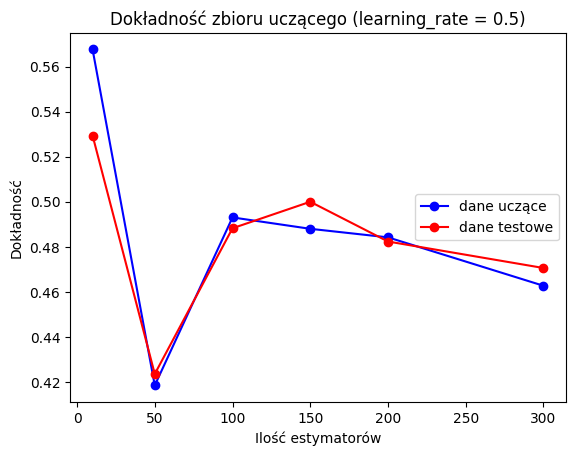

Maksymalna dokładność dla zbioru testowego: 0.5294117647058824 dla ilosći estymatorow: 10
macierz pomyłek - zbiór uczący, dokładność: 0.4892541087231353
0.4892541087231353 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   6   9   9   0   0]
 [  0  63 225  50   0   0]
 [  0  24 143 155   0   0]
 [  0   0  17  81   0   0]
 [  0   0   1   7   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.47352941176470587
0.47352941176470587
[[ 0  0  3  0  0  0]
 [ 0  0  5  3  0  0]
 [ 0 28 92 25  0  0]
 [ 0  6 60 69  0  0]
 [ 0  0 11 32  0  0]
 [ 0  0  1  5  0  0]]


macierz pomyłek - zbiór uczący, dokładność: 0.4197218710493047
0.4197218710493047 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0  11  11   2   0   0]
 [  0 100 128  79  29   2]
 [  0  35  74 129  82   2]
 [  0   1   7  27  63   0]
 [  0   0   0   0   8   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.35
0.35
[[ 0  0  3  0  0  0]
 [ 0  0  4  3  1  0]
 [ 0 54 41 35 14  1]
 [ 0  7 43 53 31  1]
 [ 0  1  5 13 24  0

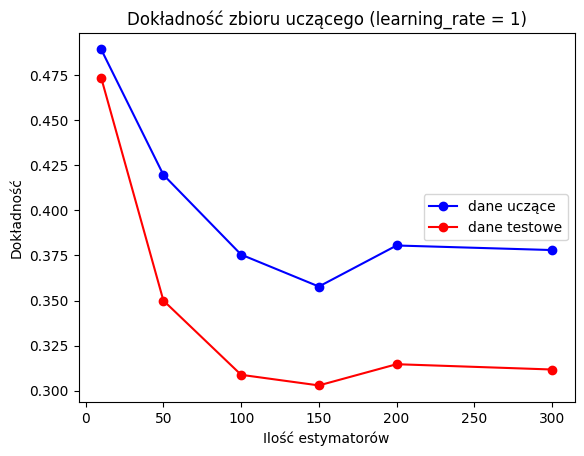

Maksymalna dokładność dla zbioru testowego: 0.47352941176470587 dla ilosći estymatorow: 10
macierz pomyłek - zbiór uczący, dokładność: 0.4639696586599241
0.4639696586599241 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0   7  16   1   0]
 [  0   0 155 147  31   5]
 [  0   0  72 143  83  24]
 [  0   0   3  19  63  13]
 [  0   0   0   0   3   5]]
macierz pomyłek - zbiór testowy, dokładność: 0.4264705882352941
0.4264705882352941
[[ 0  0  0  3  0  0]
 [ 0  0  2  4  1  1]
 [ 0  0 66 64 12  3]
 [ 0  0 33 57 37  8]
 [ 0  0  6  9 21  7]
 [ 0  0  0  2  3  1]]


macierz pomyłek - zbiór uczący, dokładność: 0.4020227560050569
0.4020227560050569 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   1  21   0   2   0]
 [  0  19 257   0  52  10]
 [  0  32 166   0  88  36]
 [  0   5  22   0  51  20]
 [  0   0   0   0   0   8]]
macierz pomyłek - zbiór testowy, dokładność: 0.3735294117647059
0.3735294117647059
[[  0   0   3   0   0   0]
 [  0   1   5   0   2   0]
 [  0  14 106   0  22 

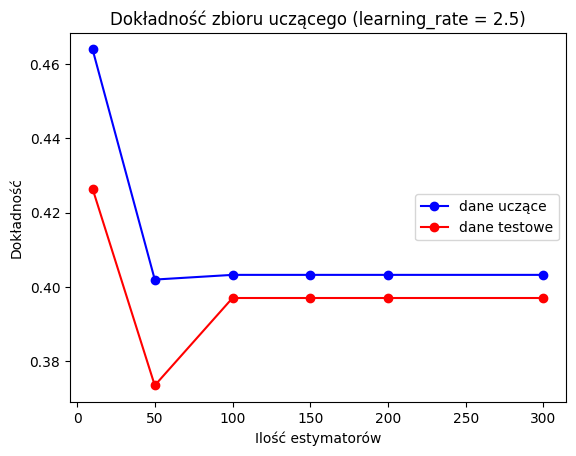

Maksymalna dokładność dla zbioru testowego: 0.4264705882352941 dla ilosći estymatorow: 10
macierz pomyłek - zbiór uczący, dokładność: 0.31352718078381797
0.31352718078381797 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0   0  14  10   0]
 [  0   0   0 289  49   0]
 [  0   0   0 166 156   0]
 [  0   0   0  17  81   0]
 [  0   0   0   0   8   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.28823529411764703
0.28823529411764703
[[  0   0   0   3   0   0]
 [  0   0   0   5   3   0]
 [  0   0   0 121  24   0]
 [  0   0   0  67  68   0]
 [  0   0   0  12  31   0]
 [  0   0   0   1   5   0]]


macierz pomyłek - zbiór uczący, dokładność: 0.19089759797724398
0.19089759797724398 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0   0   0  24   0]
 [  0   0  52   0 286   0]
 [  0   0   3   0 319   0]
 [  0   0   0   0  98   0]
 [  0   0   0   0   8   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.1676470588235294
0.1676470588235294
[[  0   0   0   0   3   0]
 [  0   

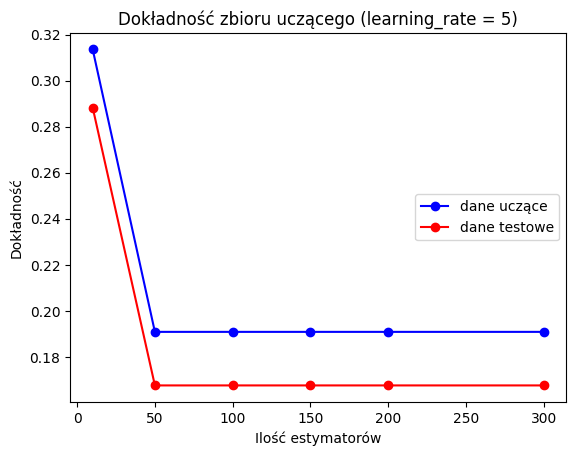

Maksymalna dokładność dla zbioru testowego: 0.28823529411764703 dla ilosći estymatorow: 10
macierz pomyłek - zbiór uczący, dokładność: 0.49557522123893805
0.49557522123893805 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0   9  15   0   0]
 [  0   0 204 134   0   0]
 [  0   0 135 187   0   0]
 [  0   0  30  68   0   0]
 [  0   0   0   8   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.4411764705882353
0.4411764705882353
[[ 0  0  0  3  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0 76 69  0  0]
 [ 0  0 61 74  0  0]
 [ 0  0 15 28  0  0]
 [ 0  0  1  5  0  0]]


macierz pomyłek - zbiór uczący, dokładność: 0.49557522123893805
0.49557522123893805 <class 'numpy.float64'>
[[  1   0   0   0   0   0]
 [  0   0   9  15   0   0]
 [  0   0 204 134   0   0]
 [  0   0 135 187   0   0]
 [  0   0  30  68   0   0]
 [  0   0   0   8   0   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.4411764705882353
0.4411764705882353
[[ 0  0  0  3  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0 76 69  0  0]
 [ 0  0 6

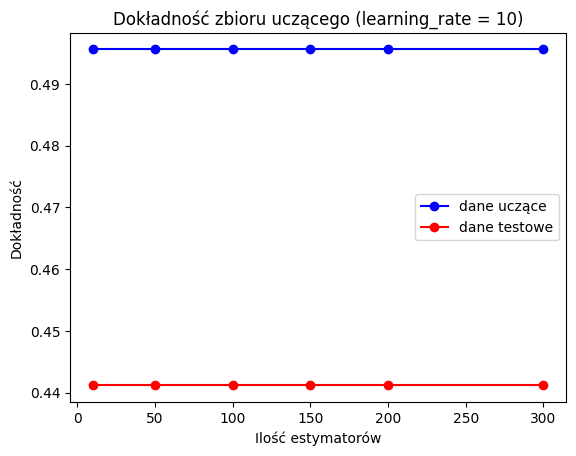

Maksymalna dokładność dla zbioru testowego: 0.4411764705882353 dla ilosći estymatorow: 10
macierz pomyłek - zbiór uczący, dokładność: 0.18963337547408343
0.18963337547408343 <class 'numpy.float64'>
[[  0   0   0   0   1   0]
 [  0   0   0   0  24   0]
 [  0   0  52   0 286   0]
 [  0   0   3   0 319   0]
 [  0   0   0   0  98   0]
 [  0   0   0   0   8   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.1676470588235294
0.1676470588235294
[[  0   0   0   0   3   0]
 [  0   0   0   0   8   0]
 [  0   0  15   0 130   0]
 [  0   0   1   0 134   0]
 [  0   0   1   0  42   0]
 [  0   0   0   0   6   0]]


macierz pomyłek - zbiór uczący, dokładność: 0.18963337547408343
0.18963337547408343 <class 'numpy.float64'>
[[  0   0   0   0   1   0]
 [  0   0   0   0  24   0]
 [  0   0  52   0 286   0]
 [  0   0   3   0 319   0]
 [  0   0   0   0  98   0]
 [  0   0   0   0   8   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.1676470588235294
0.1676470588235294
[[  0   0   0   0   3   0]
 [  0   0 

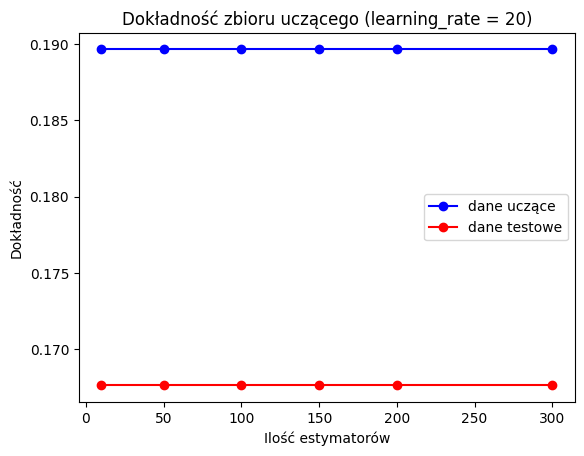

Maksymalna dokładność dla zbioru testowego: 0.1676470588235294 dla ilosći estymatorow: 10


In [16]:
learning_rates = [0.05, 0.2, 0.5, 1, 2.5, 5, 10, 20]
for r in learning_rates:
    analyze_ada_boost(r)

W przypadku klasyfikatora AdaBoost najlepsze wyniki i największą dokładność otrzymujemy dla parametrów: 
- learning rate = 0.05
- ilości estymatorów = 150

i wynoszą one:

- dla danych uczących = 0,58
- dla danych testowych = 0,64.

Jest to trochę lepsza dokładnośc dla nieznanych dla modelu danych niż w przypadku klasyfikatora Drzewa Decyzyjnego, lecz dopasowanie do danych uczących jest zdecydowanie niższe. Występuje większa generalizacja. Należy zauważyć, że również bardzo dobre wyniki otrzymaliśmy, dla parametrów learning rate równym 0,2; 0,5 i to dla najmniejszej sprawdzanej liczby estymatorów, 10: dla danych uczących kolejno: 0,54; 0,53; dla danych testowych: 0,62 (w oby dwóch przyadkach).

Jak pokazują ostatnie wykresy, wybór wartości learning rate większej od 1, nie przynosi dobrych rezultatów.

Należy zauważyć, że dla learning rate = 1 (czyli domyślnej wartości dla klasyfikatora AdaBoost) liczba estymatorów nie miała znaczenia, dla każdego otrzymaliśmy identyczne dokładności.

**być może do usunięcia teoria o AdaBoost**
Względem podejścia teoretycznego klasyfikator AdaBoost przez nas używany bazował na losowym lesie, czyli kilku drzew decyzyjnych o głębokości 1, które z odpowiednimi wagami klasyfikują 

# Opis wyników

Klasyfikacja metodą Drzewa Decyzyjnego przyniosła lepsze wyniki, niż metoda AdaBoost. Najlepsze wyniki pod względem dokładności są zaprezentowane w tabeli poniżej.

| Metoda                    | Dane uczące | Dane testowe |
| :---------------- | ------: | ----: |
| Drzewo Decyzyjne        |   0,77   | 0,59 |
| AdaBoost           |   0,58  | 0,64 |

Klasyfikator AdaBoost ma o 5 punktów procentowych wyższą zdolność do klasyfikacji danych testowych, ale osiąga dużo gorsze rezultaty w przypadku danych uczących. Oprócz tego, czas uczenia dla AdaBoost był zdecydowanie dłuższy niż dla Drzewa Decyzyjnego. Ze względu na te wnioski, klasyfikacja metodą Drzewa Decyzyjnego dla tego zbioru danych była lepsza.